In [1]:
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns

from tqdm import tqdm
from random import randint
from tqdm.auto import tqdm
tqdm.pandas()

plt.rcParams["figure.figsize"] = (20, 16)
warnings.simplefilter("ignore")



In [2]:
current_dataset = 3
name_directory = "CTU-13-Dataset"
path = os.path.join(name_directory,str(current_dataset))
os.listdir(path)

['botnet-capture-20110812-rbot.pcap', 'capture20110812.binetflow', 'README']

In [3]:
[i for i in os.listdir(path) if i.endswith(".binetflow") ]

['capture20110812.binetflow']

In [4]:
datafile_name = [i for i in os.listdir(path) if i.endswith(".binetflow") ][0]
df = pd.read_csv(os.path.join(path,datafile_name))
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/12 15:25:56.021112,11.337043,tcp,195.68.34.68,52475,->,147.32.86.165,12114,SR_SA,0.0,0.0,11,824,606,flow=Background-TCP-Established
1,2011/08/12 15:29:25.508940,2.962470,tcp,147.32.86.58,1393,->,77.75.73.156,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
2,2011/08/12 15:30:21.101931,2.962828,tcp,201.54.33.206,2550,->,147.32.86.110,443,S_RA,0.0,0.0,4,240,120,flow=Background-TCP-Attempt
3,2011/08/12 15:37:08.317877,1.986249,tcp,221.134.221.114,8204,->,147.32.84.189,51413,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
4,2011/08/12 15:33:53.620500,767.978638,tcp,147.32.84.59,49156,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,14,3710,774,flow=Background-Established-cmpgw-CVUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,2011/08/15 10:13:26.395097,0.002210,udp,147.32.85.2,55572,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=To-Background-UDP-CVUT-DNS-Server
4710634,2011/08/15 10:13:26.408351,0.000312,udp,147.32.85.2,61416,<->,147.32.80.9,53,CON,0.0,0.0,2,369,78,flow=To-Background-UDP-CVUT-DNS-Server
4710635,2011/08/15 10:13:26.412151,0.006138,tcp,147.32.85.2,49590,->,195.113.232.98,80,SPA_SPA,0.0,0.0,9,5206,295,flow=Background-TCP-Established
4710636,2011/08/15 10:13:26.427955,0.000549,udp,89.176.63.143,27520,<->,147.32.84.229,13363,CON,0.0,0.0,2,131,71,flow=Background-UDP-Established


In [5]:
def preprocess_df(df): 
    df['Sport'] = df['Sport'].fillna(-1)
    df['Dport'] = df['Dport'].fillna(-1)
    return df
df = preprocess_df(df)
#df = df.iloc[0:500]

In [6]:
df.describe()

,Dur,sTos,dTos,TotPkts,TotBytes,SrcBytes
count,4.710638e+06,4.603832e+06,4.268271e+06,4.710638e+06,4.710638e+06,4.710638e+06
mean,1.779531e+02,1.762069e-01,2.727100e-04,3.560668e+01,2.617864e+04,6.983991e+03
std,6.783478e+02,5.775615e+00,2.629716e-02,3.986630e+03,3.411990e+06,2.239477e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00
25%,2.410000e-04,0.000000e+00,0.000000e+00,2.000000e+00,2.080000e+02,7.600000e+01
50%,3.620000e-04,0.000000e+00,0.000000e+00,2.000000e+00,2.440000e+02,8.100000e+01
75%,3.096770e-01,0.000000e+00,0.000000e+00,4.000000e+00,5.360000e+02,2.220000e+02
max,3.600000e+03,1.920000e+02,3.000000e+00,3.841063e+06,3.529904e+09,3.423408e+09


In [7]:
df.Proto.value_counts()

udp          3194929
tcp          1354744
icmp          132021
igmp           19696
arp             5195
rtp             1654
rtcp            1551
ipv6-icmp        544
ipx/spx          132
ipv6              70
pim               67
unas              10
udt                8
rarp               7
esp                4
llc                3
rsvp               3
Name: Proto, dtype: int64

In [8]:
df.Dir.value_counts()

  <->    3093367
   ->    1518998
  <-       78403
   ?>       8280
  <?>       6387
  who       5202
  <?           1
Name: Dir, dtype: int64

<AxesSubplot:>

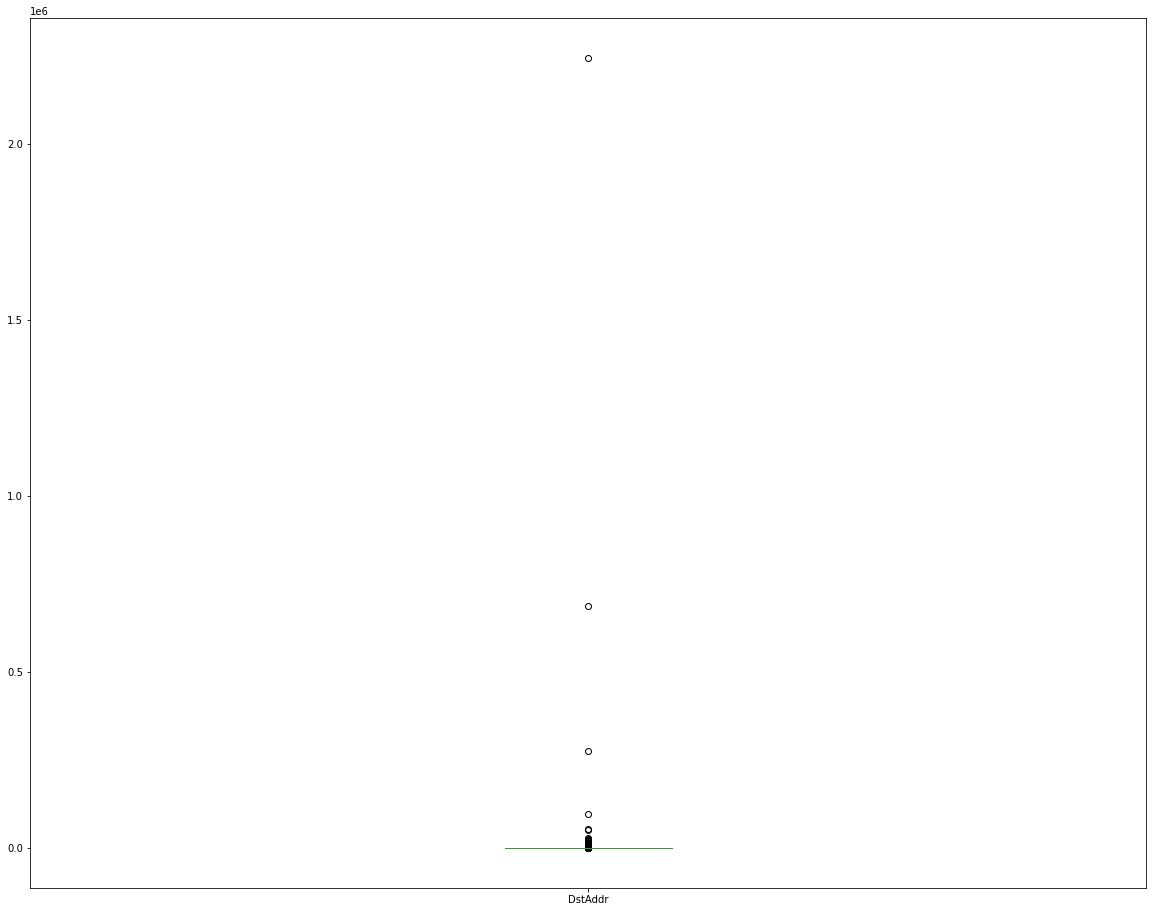

In [32]:
df.DstAddr.value_counts().plot.box()

<AxesSubplot:>

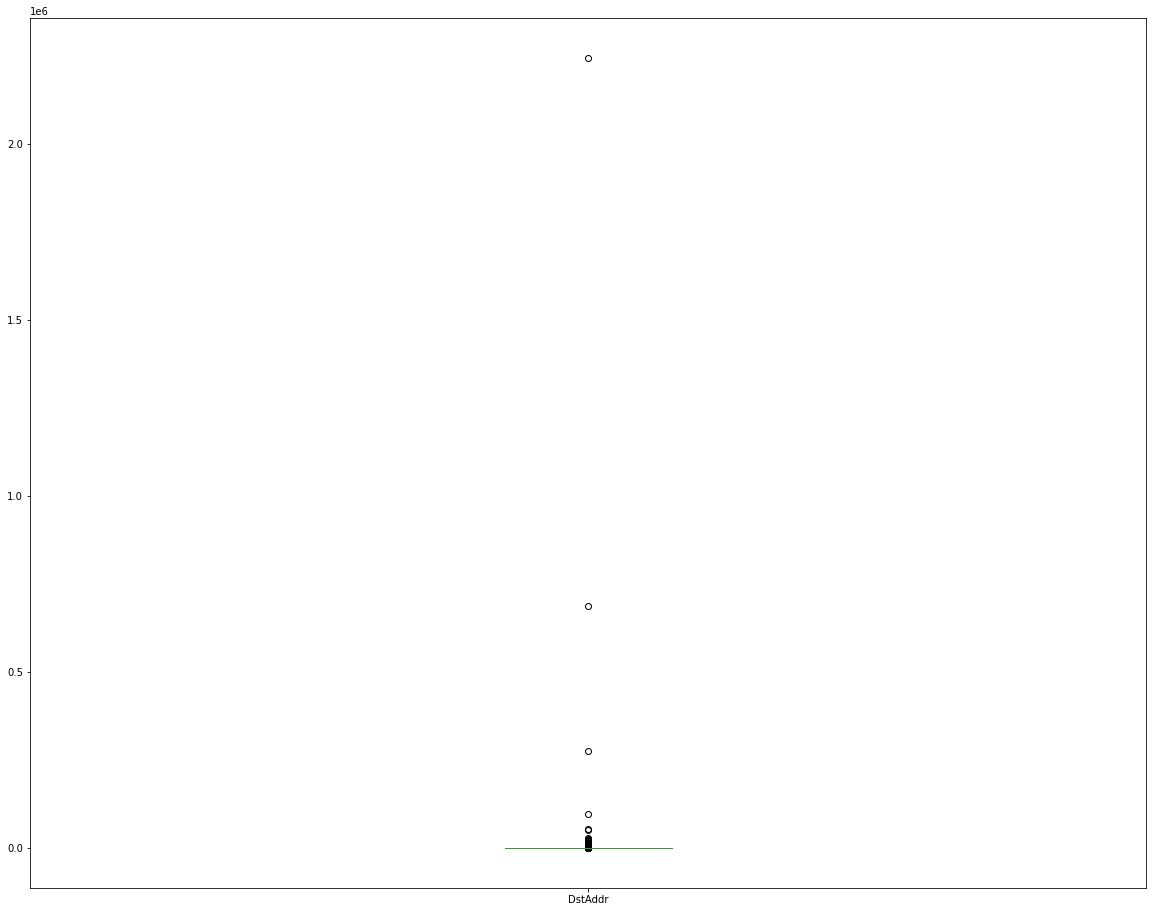

In [31]:
df.DstAddr.value_counts().plot.box()

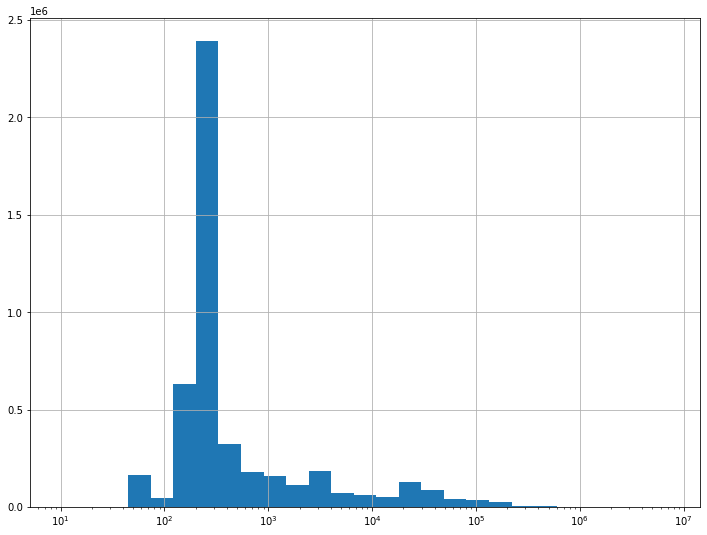

In [62]:
ax = df.TotBytes.hist(bins = 10*np.exp(np.arange(0,14,0.5)))
ax.set_xscale('log')

In [11]:
df.Label.value_counts()

flow=To-Background-UDP-CVUT-DNS-Server              2169040
flow=Background-UDP-Established                      806119
flow=Background-TCP-Established                      729048
flow=Background-TCP-Attempt                          408887
flow=Background                                      156122
flow=From-Normal-V44-Stribrek                        108807
flow=Background-UDP-Attempt                          104089
flow=Background-Established-cmpgw-CVUT                85383
flow=From-Botnet-V44-TCP-Attempt                      26234
flow=To-Background-CVUT-WebServer                     24271
flow=Background-UDP-NTP-Established-1                 22345
flow=To-Background-CVUT-Proxy                         22009
flow=Background-Attempt-cmpgw-CVUT                    13659
flow=To-Background-MatLab-Server                       8937
flow=From-Normal-V44-Grill                             4580
flow=Background-google-pop                             2654
flow=From-Normal-V44-CVUT-WebServer     

In [12]:
df_Background = df[df.Label.str.contains("Background")]
df_Background

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
0,2011/08/12 15:25:56.021112,11.337043,tcp,195.68.34.68,52475,->,147.32.86.165,12114,SR_SA,0.0,0.0,11,824,606,flow=Background-TCP-Established
1,2011/08/12 15:29:25.508940,2.962470,tcp,147.32.86.58,1393,->,77.75.73.156,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt
2,2011/08/12 15:30:21.101931,2.962828,tcp,201.54.33.206,2550,->,147.32.86.110,443,S_RA,0.0,0.0,4,240,120,flow=Background-TCP-Attempt
3,2011/08/12 15:37:08.317877,1.986249,tcp,221.134.221.114,8204,->,147.32.84.189,51413,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt
4,2011/08/12 15:33:53.620500,767.978638,tcp,147.32.84.59,49156,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,14,3710,774,flow=Background-Established-cmpgw-CVUT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,2011/08/15 10:13:26.395097,0.002210,udp,147.32.85.2,55572,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=To-Background-UDP-CVUT-DNS-Server
4710634,2011/08/15 10:13:26.408351,0.000312,udp,147.32.85.2,61416,<->,147.32.80.9,53,CON,0.0,0.0,2,369,78,flow=To-Background-UDP-CVUT-DNS-Server
4710635,2011/08/15 10:13:26.412151,0.006138,tcp,147.32.85.2,49590,->,195.113.232.98,80,SPA_SPA,0.0,0.0,9,5206,295,flow=Background-TCP-Established
4710636,2011/08/15 10:13:26.427955,0.000549,udp,89.176.63.143,27520,<->,147.32.84.229,13363,CON,0.0,0.0,2,131,71,flow=Background-UDP-Established


In [13]:
df_Botnet = df[df.Label.str.contains("Botnet")]
df_Botnet

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label
5328,2011/08/12 15:25:50.064002,3588.116699,tcp,38.229.70.20,6667,<?>,147.32.84.165,1027,PA_PA,0.0,0.0,81,5886,3753,flow=From-Botnet-V44-TCP-CC107-IRC-Not-Encrypted
61485,2011/08/12 15:53:17.142311,1966.745239,icmp,147.32.84.165,0x0303,->,81.166.246.198,0x8769,URP,0.0,NaN,3,285,285,flow=From-Botnet-V44-ICMP
129652,2011/08/12 16:27:56.085638,3519.105225,tcp,38.229.70.20,6667,<?>,147.32.84.165,1027,PA_PA,0.0,0.0,219,19248,9388,flow=From-Botnet-V44-TCP-CC107-IRC-Not-Encrypted
178233,2011/08/12 16:56:52.873156,0.000456,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,400,74,flow=From-Botnet-V44-UDP-DNS
181705,2011/08/12 16:59:13.459181,0.121586,udp,147.32.84.165,1026,<->,147.32.80.9,53,CON,0.0,0.0,2,292,72,flow=From-Botnet-V44-UDP-DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4520301,2011/08/15 09:25:26.819651,9.014144,tcp,147.32.84.165,2909,->,223.255.170.91,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt
4520369,2011/08/15 09:25:28.020389,9.013652,tcp,147.32.84.165,2910,->,223.255.178.83,22,S_,0.0,NaN,3,186,186,flow=From-Botnet-V44-TCP-Attempt
4532951,2011/08/15 09:29:18.079118,0.000000,udp,147.32.84.165,137,->,192.168.88.121,45366,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt
4576872,2011/08/15 09:42:00.883399,0.000000,udp,147.32.84.165,137,->,192.168.88.121,43886,INT,0.0,NaN,1,104,104,flow=From-Botnet-V44-UDP-Attempt


In [14]:
del df_Background
del df_Botnet

In [15]:
df["Backgroung_label"] = df.Label.str.contains("Background")
df["Normal_label"] = df.Label.str.contains("Normal")
df["Botnet_label"] = df.Label.str.contains("Botnet")

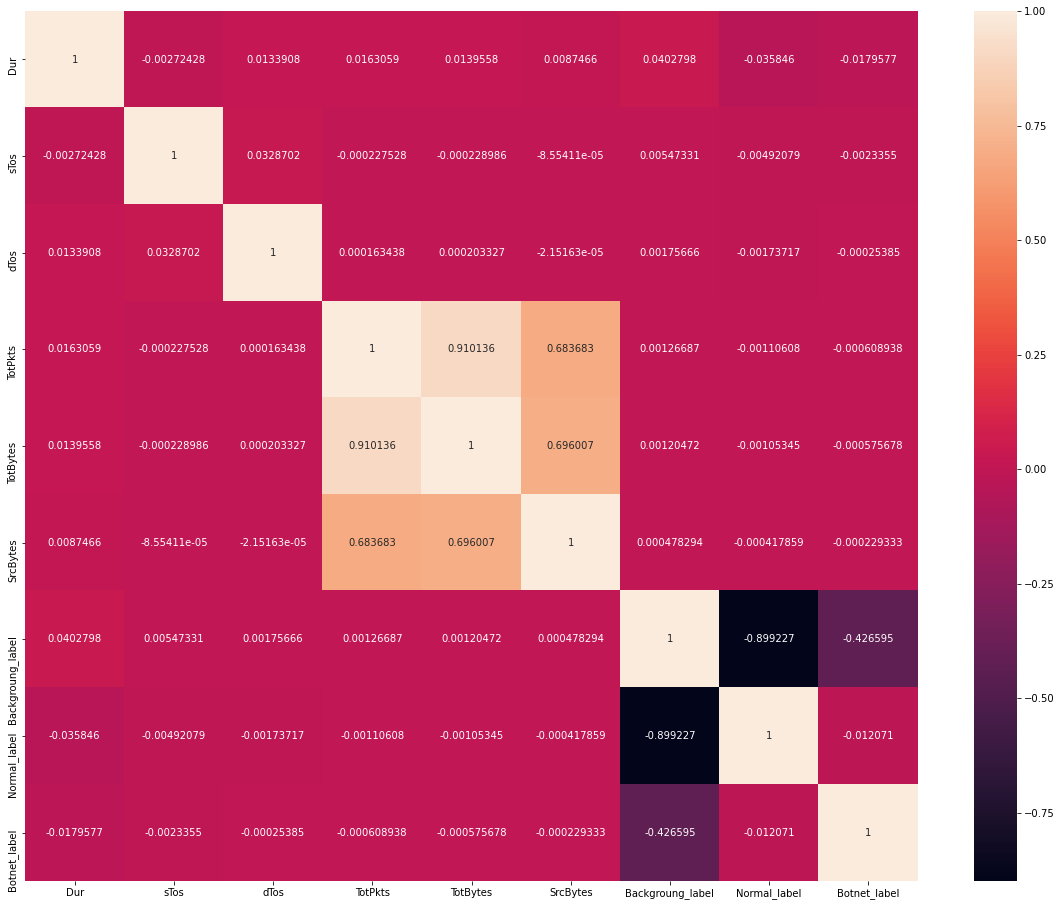

In [16]:
df_corr = df.corr()

ax= plt.subplot()
sns.heatmap(df_corr, annot=True, fmt='g', ax=ax); 


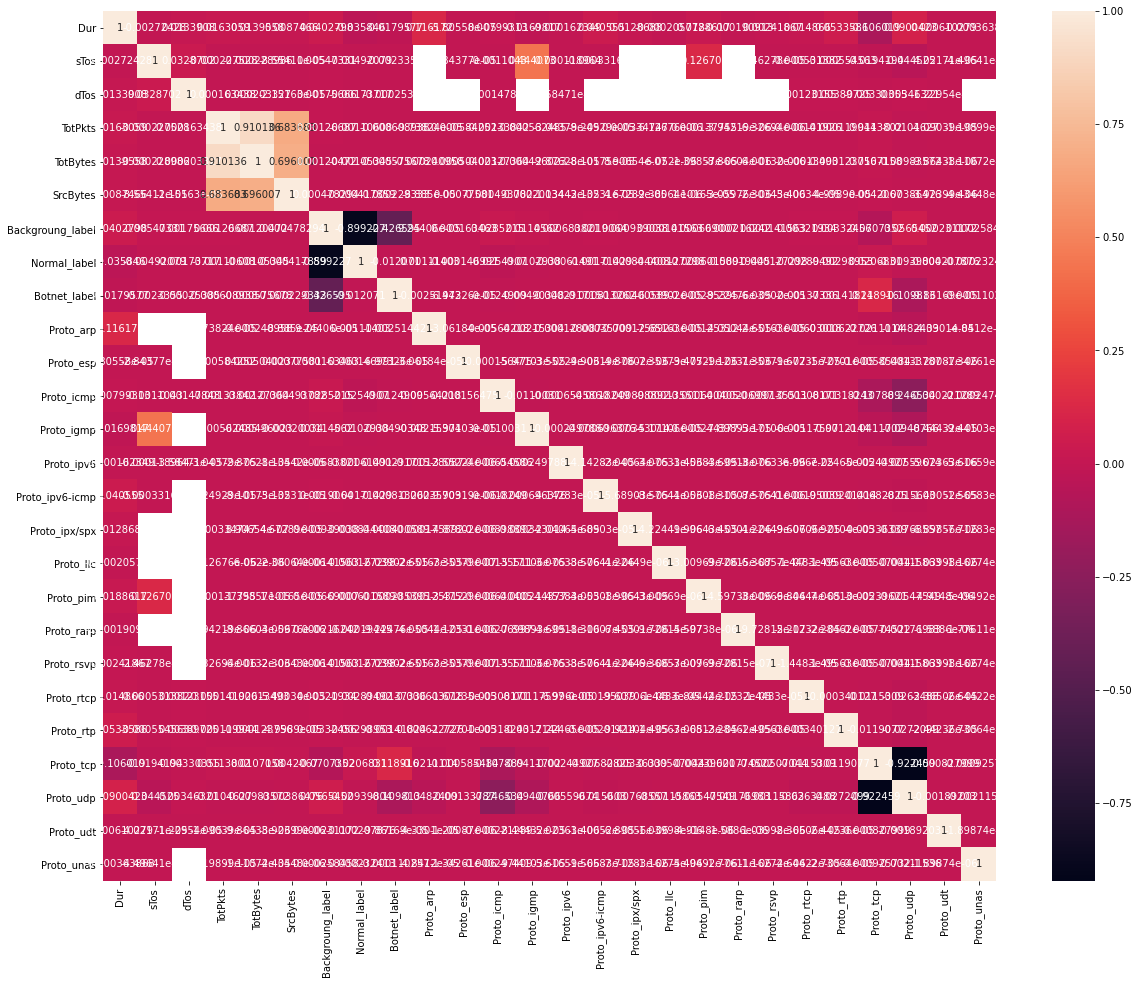

In [17]:
columns_to_one_hot = ["Proto"]#, "Dir", "State" ]


def plot_corr_matrix_for_one_hot(df, col_name) :
    one_hot_df = df.copy()
    one_hot = pd.get_dummies(df[col_name], prefix=col_name)
    one_hot_df = one_hot_df.join(one_hot)
    
    df_corr_one = one_hot_df.corr()
    ax= plt.subplot()
    sns.heatmap(df_corr_one, annot=True, fmt='g', ax=ax)
    
plot_corr_matrix_for_one_hot(df, "Proto")

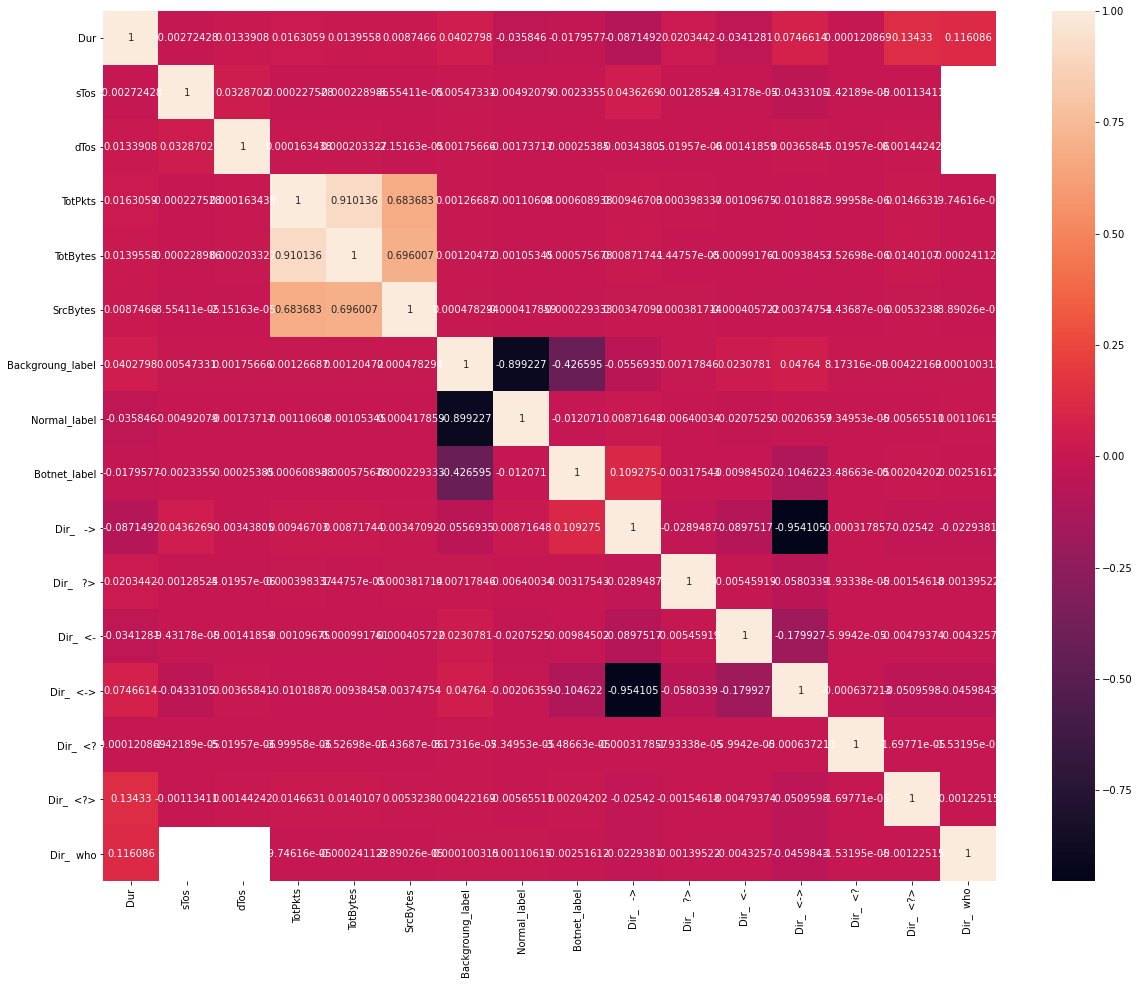

In [18]:
plot_corr_matrix_for_one_hot(df, "Dir")


In [19]:
#plot_corr_matrix_for_one_hot(df, "State")


In [20]:
df

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
0,2011/08/12 15:25:56.021112,11.337043,tcp,195.68.34.68,52475,->,147.32.86.165,12114,SR_SA,0.0,0.0,11,824,606,flow=Background-TCP-Established,True,False,False
1,2011/08/12 15:29:25.508940,2.962470,tcp,147.32.86.58,1393,->,77.75.73.156,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt,True,False,False
2,2011/08/12 15:30:21.101931,2.962828,tcp,201.54.33.206,2550,->,147.32.86.110,443,S_RA,0.0,0.0,4,240,120,flow=Background-TCP-Attempt,True,False,False
3,2011/08/12 15:37:08.317877,1.986249,tcp,221.134.221.114,8204,->,147.32.84.189,51413,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt,True,False,False
4,2011/08/12 15:33:53.620500,767.978638,tcp,147.32.84.59,49156,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,14,3710,774,flow=Background-Established-cmpgw-CVUT,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,2011/08/15 10:13:26.395097,0.002210,udp,147.32.85.2,55572,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
4710634,2011/08/15 10:13:26.408351,0.000312,udp,147.32.85.2,61416,<->,147.32.80.9,53,CON,0.0,0.0,2,369,78,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
4710635,2011/08/15 10:13:26.412151,0.006138,tcp,147.32.85.2,49590,->,195.113.232.98,80,SPA_SPA,0.0,0.0,9,5206,295,flow=Background-TCP-Established,True,False,False
4710636,2011/08/15 10:13:26.427955,0.000549,udp,89.176.63.143,27520,<->,147.32.84.229,13363,CON,0.0,0.0,2,131,71,flow=Background-UDP-Established,True,False,False


# MINDS

Features considered : 

- the number of NetFlows from the same **source IP address** as the evaluated NetFlow
- the number of NetFlows toward the same **destination host**
- the number of NetFlows towards the same **destination host** from the same **source port**
- the number of NetFlows from the same **source host** towards the same **destination port**.

<AxesSubplot:>

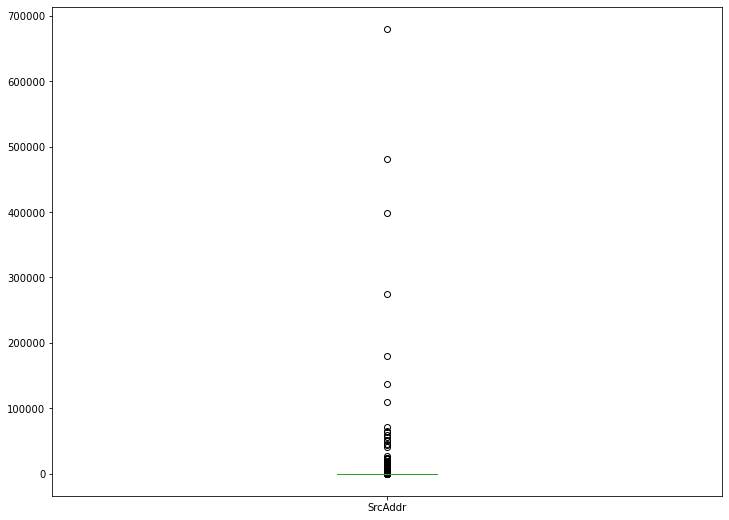

In [41]:
plt.rcParams["figure.figsize"] = (12, 9)
df.SrcAddr.value_counts().reset_index(drop=True).plot.box()


<AxesSubplot:>

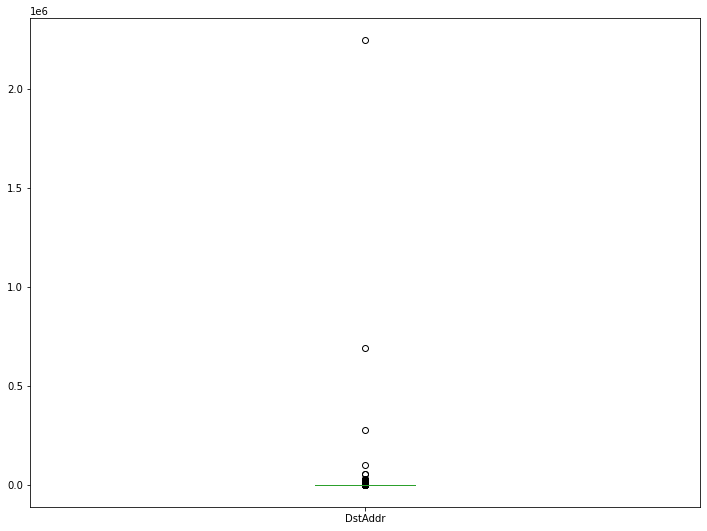

In [42]:
df.DstAddr.value_counts().reset_index(drop=True).plot.box()

<AxesSubplot:>

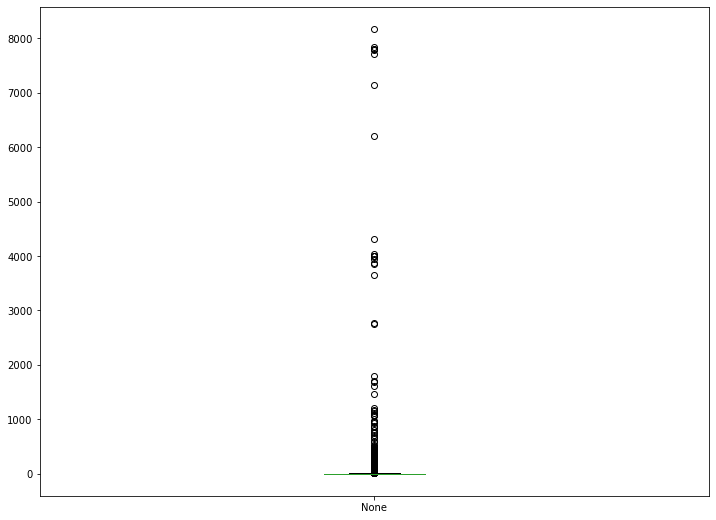

In [43]:
df[["DstAddr","Sport"]].value_counts().plot.box()

<AxesSubplot:>

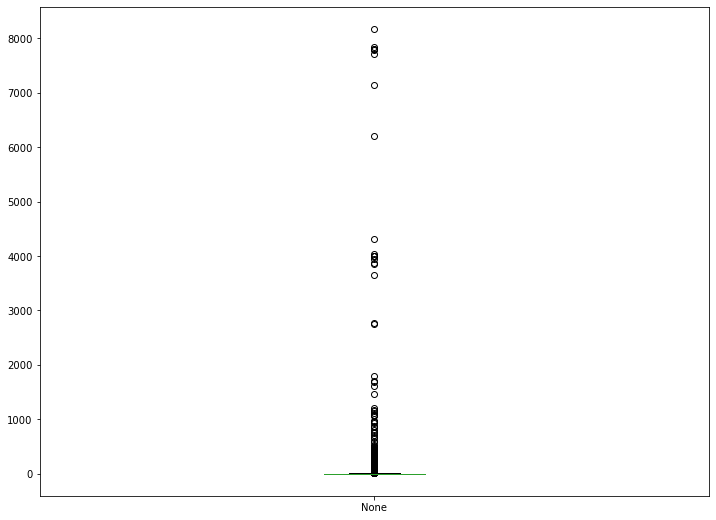

In [44]:

df[["DstAddr","Sport"]].value_counts().plot.box()

The anomaly value for a NetFlow is based on **its distance to the normal sample.** The metric defined in this **four dimensional context space uses a logarithmic scale** on each
context dimension, and these marginal distances are combined
into the global distance as **the sum of their squares**. 

In the CAMNEP implementation of this algorithm, the variance adjusted difference between the floating average of past
values and the evaluated NetFlow on each of the four context
dimensions is used to know if the evaluated NetFlow is
anomalous. The original work is based on the combination of
computationally-intensive clustering and human intervention.

In [21]:
df_for_minds = df[["SrcAddr","DstAddr","Sport", "Dport","Label","Backgroung_label","Normal_label","Botnet_label"]]

In [22]:
df_for_minds

,SrcAddr,DstAddr,Sport,Dport,Label,Backgroung_label,Normal_label,Botnet_label
0,195.68.34.68,147.32.86.165,52475,12114,flow=Background-TCP-Established,True,False,False
1,147.32.86.58,77.75.73.156,1393,80,flow=Background-TCP-Attempt,True,False,False
2,201.54.33.206,147.32.86.110,2550,443,flow=Background-TCP-Attempt,True,False,False
3,221.134.221.114,147.32.84.189,8204,51413,flow=Background-TCP-Attempt,True,False,False
4,147.32.84.59,147.32.80.7,49156,80,flow=Background-Established-cmpgw-CVUT,True,False,False
...,...,...,...,...,...,...,...,...
4710633,147.32.85.2,147.32.80.9,55572,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
4710634,147.32.85.2,147.32.80.9,61416,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
4710635,147.32.85.2,195.113.232.98,49590,80,flow=Background-TCP-Established,True,False,False
4710636,89.176.63.143,147.32.84.229,27520,13363,flow=Background-UDP-Established,True,False,False


In [23]:

def adapt_df_to_minds_features(df) :

    print("Computing Count_Same_Src_Host ....")
    values_counts_src_ip = df.SrcAddr.value_counts()
    df["Count_Same_Src_Host"] = df["SrcAddr"].progress_apply(lambda x : values_counts_src_ip.loc[x])

    print("Computing Count_Same_Dest_Host ....")
    values_counts_dest_ip = df.DstAddr.value_counts()
    df["Count_Same_Dest_Host"] = df["DstAddr"].progress_apply(lambda x : values_counts_dest_ip.loc[x])

    print("Computing Count_Same_Dest_Host_Src_port ....")
    values_counts_dest_ip_source_port = df[["DstAddr","Sport"]].value_counts()
    df["Count_Same_Dest_Host_Src_port"] = df.progress_apply(lambda x : values_counts_dest_ip_source_port.loc[x["DstAddr"],x["Sport"]], axis= 1)
    

    print("Computing Count_Same_Src_Host_Dest_port ....")
    values_counts_source_ip_dest_port = df[["SrcAddr","Dport"]].value_counts()
    df["Count_Same_Src_Host_Dest_port"] = df.progress_apply(lambda x : values_counts_source_ip_dest_port.loc[x["SrcAddr"],x["Dport"]], axis= 1)
    
    
    return df
    
    
df_minds_contexts = adapt_df_to_minds_features(df_for_minds)
df_minds_contexts

Computing Count_Same_Src_Host ....


  0%|          | 0/4710638 [00:00<?, ?it/s]

Computing Count_Same_Dest_Host ....


  0%|          | 0/4710638 [00:00<?, ?it/s]

Count_Same_Dest_Host_Src_port ....


  0%|          | 0/4710638 [00:00<?, ?it/s]

Count_Same_Src_Host_Dest_port ....


  0%|          | 0/4710638 [00:00<?, ?it/s]

,SrcAddr,DstAddr,Sport,Dport,Label,Backgroung_label,Normal_label,Botnet_label,Count_Same_Src_Host,Count_Same_Dest_Host,Count_Same_Dest_Host_Src_port,Count_Same_Src_Host_Dest_port
0,195.68.34.68,147.32.86.165,52475,12114,flow=Background-TCP-Established,True,False,False,2,7845,2,2
1,147.32.86.58,77.75.73.156,1393,80,flow=Background-TCP-Attempt,True,False,False,3578,197,2,2171
2,201.54.33.206,147.32.86.110,2550,443,flow=Background-TCP-Attempt,True,False,False,5,496,2,2
3,221.134.221.114,147.32.84.189,8204,51413,flow=Background-TCP-Attempt,True,False,False,6,3318,2,6
4,147.32.84.59,147.32.80.7,49156,80,flow=Background-Established-cmpgw-CVUT,True,False,False,179016,2501,5,58704
...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,147.32.85.2,147.32.80.9,55572,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False,845,2246170,84,263
4710634,147.32.85.2,147.32.80.9,61416,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False,845,2246170,42,263
4710635,147.32.85.2,195.113.232.98,49590,80,flow=Background-TCP-Established,True,False,False,845,740,2,309
4710636,89.176.63.143,147.32.84.229,27520,13363,flow=Background-UDP-Established,True,False,False,3,687631,17,3


In [45]:
new_columns = ["Count_Same_Src_Host","Count_Same_Dest_Host","Count_Same_Dest_Host_Src_port","Count_Same_Src_Host_Dest_port"]

In [46]:
for col in tqdm(new_columns) :
    df_minds_contexts[col] = np.log10(df_minds_contexts[col])

df_minds_contexts[""]=

  0%|          | 0/4 [00:00<?, ?it/s]

In [47]:
df_minds_contexts

,SrcAddr,DstAddr,Sport,Dport,Label,Backgroung_label,Normal_label,Botnet_label,Count_Same_Src_Host,Count_Same_Dest_Host,Count_Same_Dest_Host_Src_port,Count_Same_Src_Host_Dest_port
0,195.68.34.68,147.32.86.165,52475,12114,flow=Background-TCP-Established,True,False,False,0.301030,3.894593,0.301030,0.301030
1,147.32.86.58,77.75.73.156,1393,80,flow=Background-TCP-Attempt,True,False,False,3.553640,2.294466,0.301030,3.336660
2,201.54.33.206,147.32.86.110,2550,443,flow=Background-TCP-Attempt,True,False,False,0.698970,2.695482,0.301030,0.301030
3,221.134.221.114,147.32.84.189,8204,51413,flow=Background-TCP-Attempt,True,False,False,0.778151,3.520876,0.301030,0.778151
4,147.32.84.59,147.32.80.7,49156,80,flow=Background-Established-cmpgw-CVUT,True,False,False,5.252892,3.398114,0.698970,4.768668
...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,147.32.85.2,147.32.80.9,55572,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False,2.926857,6.351443,1.924279,2.419956
4710634,147.32.85.2,147.32.80.9,61416,53,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False,2.926857,6.351443,1.623249,2.419956
4710635,147.32.85.2,195.113.232.98,49590,80,flow=Background-TCP-Established,True,False,False,2.926857,2.869232,0.301030,2.489958
4710636,89.176.63.143,147.32.84.229,27520,13363,flow=Background-UDP-Established,True,False,False,0.477121,5.837355,1.230449,0.477121


# Lakhina Volume

In [48]:
df_for_Lakhina = df[["SrcAddr","TotBytes","Label","Backgroung_label","Normal_label","Botnet_label"]]

,StartTime,Dur,Proto,SrcAddr,Sport,Dir,DstAddr,Dport,State,sTos,dTos,TotPkts,TotBytes,SrcBytes,Label,Backgroung_label,Normal_label,Botnet_label
0,2011/08/12 15:25:56.021112,11.337043,tcp,195.68.34.68,52475,->,147.32.86.165,12114,SR_SA,0.0,0.0,11,824,606,flow=Background-TCP-Established,True,False,False
1,2011/08/12 15:29:25.508940,2.962470,tcp,147.32.86.58,1393,->,77.75.73.156,80,SR_A,0.0,0.0,3,182,122,flow=Background-TCP-Attempt,True,False,False
2,2011/08/12 15:30:21.101931,2.962828,tcp,201.54.33.206,2550,->,147.32.86.110,443,S_RA,0.0,0.0,4,240,120,flow=Background-TCP-Attempt,True,False,False
3,2011/08/12 15:37:08.317877,1.986249,tcp,221.134.221.114,8204,->,147.32.84.189,51413,S_RA,0.0,0.0,4,252,132,flow=Background-TCP-Attempt,True,False,False
4,2011/08/12 15:33:53.620500,767.978638,tcp,147.32.84.59,49156,->,147.32.80.7,80,SRPA_FSPA,0.0,0.0,14,3710,774,flow=Background-Established-cmpgw-CVUT,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710633,2011/08/15 10:13:26.395097,0.002210,udp,147.32.85.2,55572,<->,147.32.80.9,53,CON,0.0,0.0,2,505,78,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
4710634,2011/08/15 10:13:26.408351,0.000312,udp,147.32.85.2,61416,<->,147.32.80.9,53,CON,0.0,0.0,2,369,78,flow=To-Background-UDP-CVUT-DNS-Server,True,False,False
4710635,2011/08/15 10:13:26.412151,0.006138,tcp,147.32.85.2,49590,->,195.113.232.98,80,SPA_SPA,0.0,0.0,9,5206,295,flow=Background-TCP-Established,True,False,False
4710636,2011/08/15 10:13:26.427955,0.000549,udp,89.176.63.143,27520,<->,147.32.84.229,13363,CON,0.0,0.0,2,131,71,flow=Background-UDP-Established,True,False,False
